In [1]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased", output_attentions=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn

In [11]:
sentence = "dylan is a songwriter"
inputs = tokenizer.encode(sentence, return_tensors='pt')
outputs = model(inputs)
attention = outputs[-1]  # Output includes attention weights when output_attentions=True
tokens = tokenizer.convert_ids_to_tokens(inputs[0]) 
from bertviz import head_view
head_view(attention, tokens)

<IPython.core.display.Javascript object>

<AxesSubplot:>

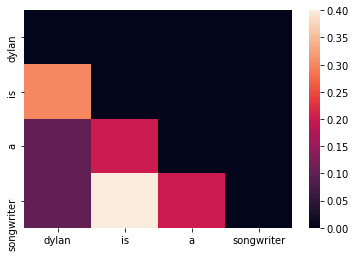

In [152]:
att_matrix_11 = attention[0][0][11][1:-1][:, 1:-1].detach().numpy()
att_matrix_11[0][0]=0
att_matrix_11[0][1]=0
att_matrix_11[0][2]=0
att_matrix_11[0][3]=0
att_matrix_11[1][0]=0.3
att_matrix_11[1][1]=0
att_matrix_11[1][2]=0
att_matrix_11[1][3]=0
att_matrix_11[2][0]=0.1
att_matrix_11[2][1]=0.2
att_matrix_11[2][2]=0
att_matrix_11[2][3]=0
att_matrix_11[3][0]=0.1
att_matrix_11[3][1]=0.4
att_matrix_11[3][2]=0.2
att_matrix_11[3][3]=0
words = sentence.split(' ')
df = pd.DataFrame(att_matrix_11, columns=words, index=words)
seaborn.heatmap(df)

In [214]:
att_matrix_11[3][1]

0.4

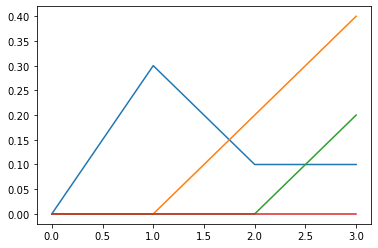

In [156]:
from matplotlib import pyplot as plt
plt.plot(att_matrix_11)
plt.show()

In [161]:
for i in att_matrix_11:
    print(i)

[0. 0. 0. 0.]
[0.3 0.  0.  0. ]
[0.1 0.2 0.  0. ]
[0.1 0.4 0.2 0. ]


In [197]:
maxInColumns = np.amax(att_matrix_11, axis=0)
print('Max value of every column: ', maxInColumns)

Max value of every column:  [0.3 0.4 0.2 0. ]


In [208]:
maxElement = np.amax(maxInColumns)
print('Max element from Numpy Array : ', maxElement)

Max element from Numpy Array :  0.4


In [217]:
df = pd.DataFrame(maxInColumns,
                 index=['dylan', 'is', 'a', 'songwriter'],
                 columns=['digits', 'words'])


ValueError: Shape of passed values is (4, 1), indices imply (4, 2)

In [64]:
a = np.array([[0, 0, 0, 0], [0.3, 0, 0, 0], [0.1,0.2, 0, 0],[0.1, 0.4, 0.2, 0]])

In [65]:
print(a) for i in att_matrix_11:
    for y in i:
        maxElement = np.amax(att_matrix_11)
        print(maxElement)

[[0.  0.  0.  0. ]
 [0.3 0.  0.  0. ]
 [0.1 0.2 0.  0. ]
 [0.1 0.4 0.2 0. ]]


In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn


In [120]:
a = np.array([[0, 0, 0, 0], [0.3, 0, 0, 0], [0.1,0.2, 0, 0],[0.1, 0.4, 0.2, 0]])

In [122]:
mat = np.dot(a.reshape(1, 4).T, ar.reshape(1, 4))
df = pd.DataFrame(mat, columns = ['Dylan', 'is', 'a', 'songwriter'],
  index = ['songwriter', 'a', 'is', 'Dylan'])
seaborn.heatmap(df, annot = True, cbar = True, cmap = 'plasma')

ValueError: cannot reshape array of size 16 into shape (1,4)